In [55]:
import open3d as o3d 
import os 
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

In [56]:
path = os.path.join(os.getcwd(), "Data/Dataset/training/SteeringData/1671529919.181536198.pcd")


In [57]:
pcd = np.asarray(o3d.io.read_point_cloud(path).points)   

In [58]:
image = np.zeros((64, 1024))
N, _ = pcd.shape
FOV_UP = 2
FOV_DOWN = -24.8
FOV = FOV_UP - FOV_DOWN

In [59]:
for i in range(N):
    x, y, z = pcd[i][0], pcd[i][1], pcd[i][2]
    r = math.sqrt(x**2+y**2+z**2)
    pitch = math.asin(z/r) * (180/np.pi)
    yaw = math.atan(y/x) * (180/np.pi)
    
    u =  math.floor(64 * ((FOV_UP - pitch ) / FOV))
    v =  math.floor(1024 * ((yaw + 180) / 360))
    
    image[u][v] = r
   
    
    


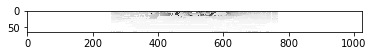

In [63]:
plt.imshow(image, cmap="Greys")